In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [232]:
df = pd.read_csv("Mall_Customers.csv")

In [233]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [235]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [236]:
df.shape

(200, 5)

In [237]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [238]:
X = df.drop("CustomerID", axis=1)

In [239]:
df.duplicated().sum()

0

In [240]:
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: Gender
Gender
Female    112
Male       88
Name: count, dtype: int64
------------------------------


In [241]:
X = pd.get_dummies(df, columns=["Gender"])

In [242]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [243]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

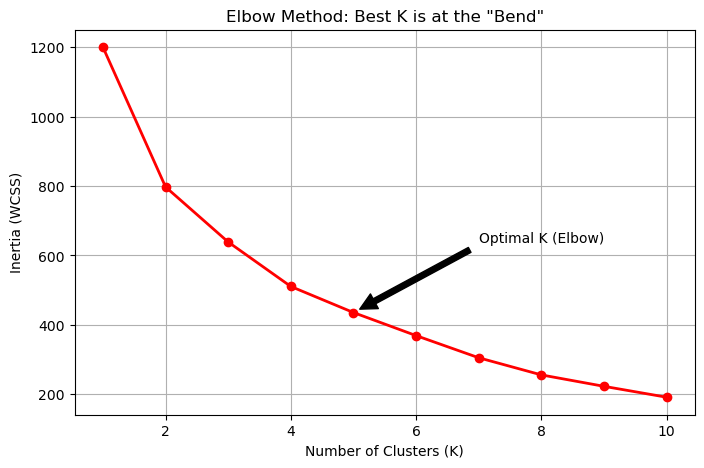

In [244]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red', linewidth=2)
plt.title('Elbow Method: Best K is at the "Bend"')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')

plt.annotate('Optimal K (Elbow)', xy=(5, wcss[4]), xytext=(7, wcss[2]),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


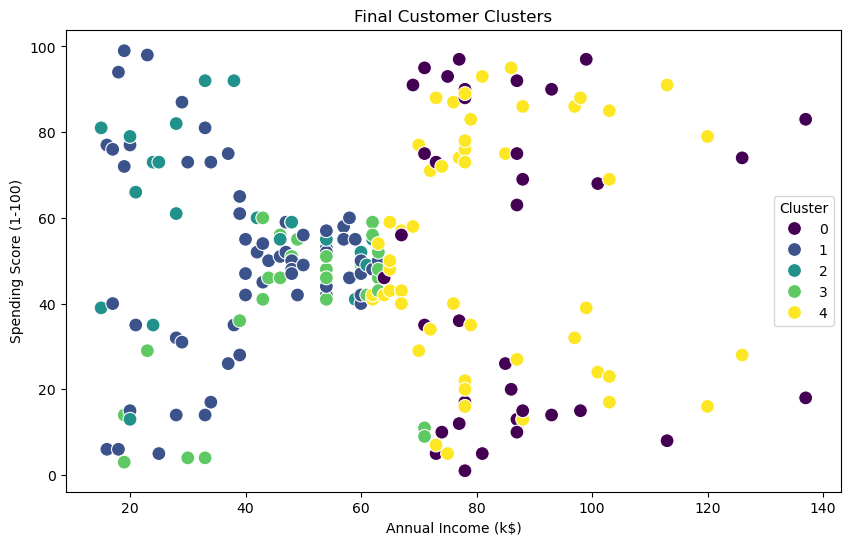

In [245]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.title('Final Customer Clusters')
plt.show()

In [246]:
scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

best_k = k_range[scores.index(max(scores))]
max_accuracy = max(scores)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

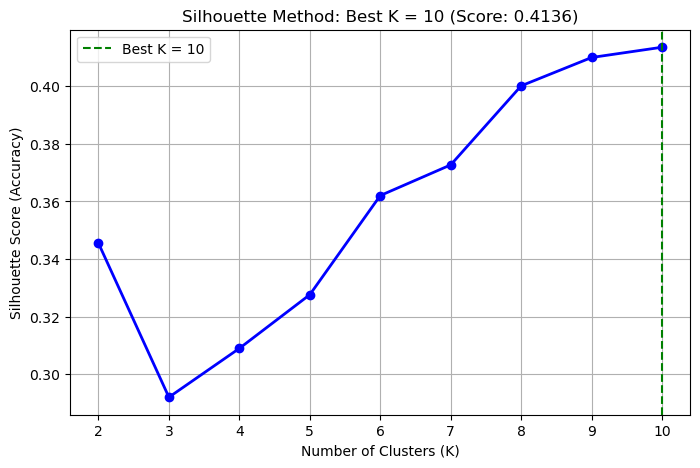

In [247]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o', color='blue', linewidth=2)
plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best K = {best_k}')
plt.title(f'Silhouette Method: Best K = {best_k} (Score: {max_accuracy:.4f})')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

In [248]:
print(f"Silhouette Analysis: The best K is {best_k} with an accuracy score of {max_accuracy:.4f}")

Silhouette Analysis: The best K is 10 with an accuracy score of 0.4136


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


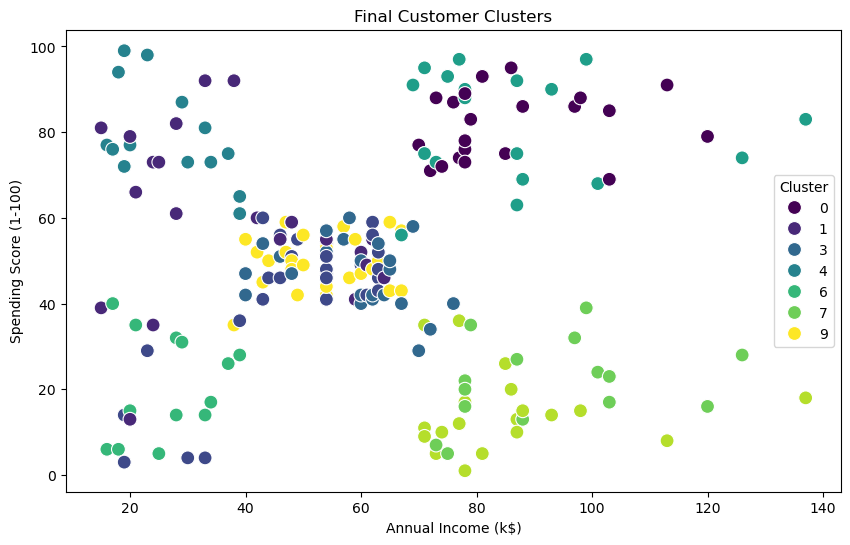

In [249]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.title('Final Customer Clusters')
plt.show()

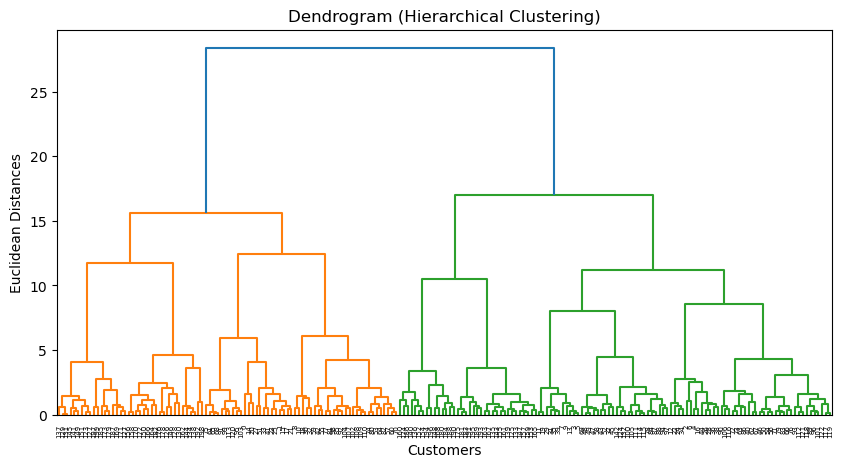

In [250]:
plt.figure(figsize=(10, 5))

linkage_matrix = sch.linkage(X_scaled, method='ward')
dendrogram = sch.dendrogram(linkage_matrix)

plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [251]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

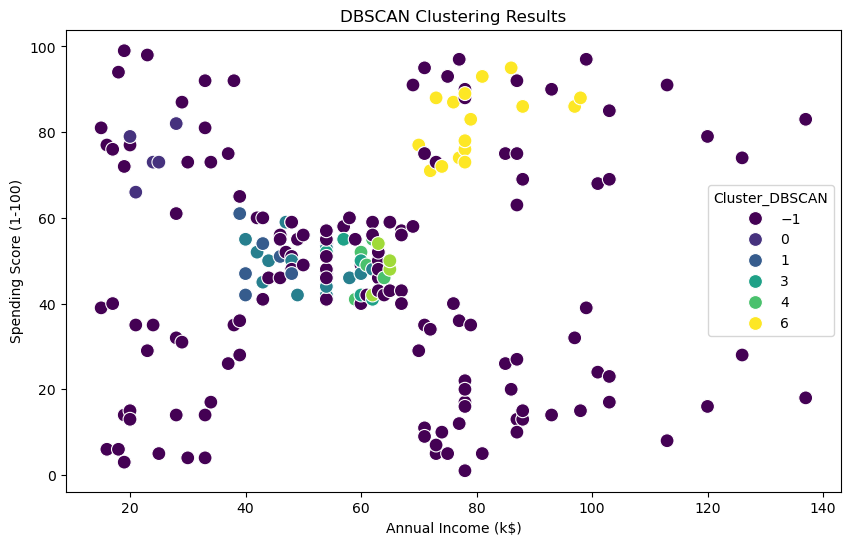

In [252]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_DBSCAN', palette='viridis', s=100)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()